<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/store_data_FP_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# 1. 데이터 로드
file_path = '/content/store_data.csv'  # 업로드한 데이터 파일 경로로 수정
df = pd.read_csv(file_path)

# 2. 데이터 확인
print(df.head())  # 첫 몇 개의 행을 확인

# 3. 데이터 전처리 (One-Hot Encoding)
# 각 거래에서 상품이 있는지를 1로, 없는지를 0으로 표시
encoded_df = df.notnull().astype(int)

# 데이터 전처리 결과 확인
print(encoded_df.head())


           shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN

In [2]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# 1. FP-Growth 알고리즘 적용
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)

# 2. 연관 규칙 도출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 3. 결과 확인
print(frequent_itemsets.head())  # 빈번한 항목 집합 확인
print(rules.head())  # 연관 규칙 확인


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support          itemsets
0  1.000000          (shrimp)
1  0.766133         (almonds)
2  0.585067         (avocado)
3  0.445867  (vegetables mix)
4  0.337067    (green grapes)
  antecedents       consequents  antecedent support  consequent support  \
0   (almonds)          (shrimp)            0.766133            1.000000   
1    (shrimp)         (almonds)            1.000000            0.766133   
2    (shrimp)         (avocado)            1.000000            0.585067   
3   (avocado)          (shrimp)            0.585067            1.000000   
4    (shrimp)  (vegetables mix)            1.000000            0.445867   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  0.766133    1.000000   1.0       0.0         inf            0.0  
1  0.766133    0.766133   1.0       0.0         1.0            0.0  
2  0.585067    0.585067   1.0       0.0         1.0            0.0  
3  0.585067    1.000000   1.0       0.0         inf            0.0  
4  0.445867    0.445867 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


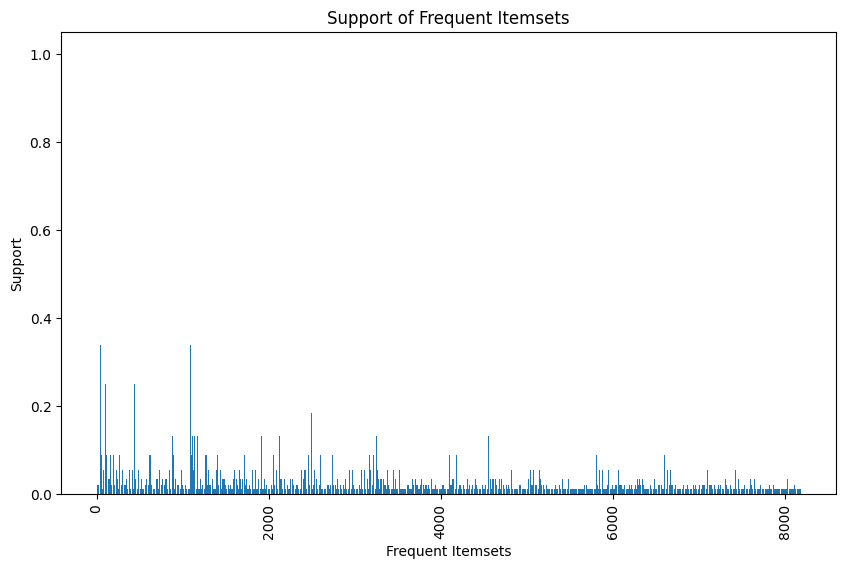

In [3]:
import matplotlib.pyplot as plt

# 빈번한 항목 집합의 지원도 히스토그램
plt.figure(figsize=(10, 6))
plt.bar(frequent_itemsets.index, frequent_itemsets['support'])
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Support of Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


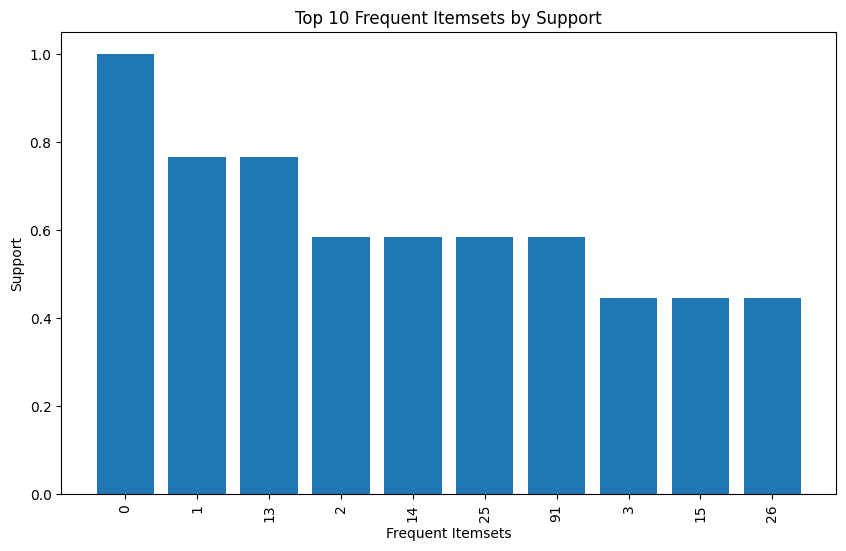

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
import matplotlib.pyplot as plt


encoded_df_cleaned = encoded_df

frequent_itemsets = fpgrowth(encoded_df_cleaned, min_support=0.01, use_colnames=True)

top_10_frequent_itemsets = frequent_itemsets.nlargest(10, 'support')

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_frequent_itemsets)), top_10_frequent_itemsets['support'], tick_label=top_10_frequent_itemsets.index)
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xticks(rotation=90)
plt.show()

In [14]:
# 지지도가 높은 상위 항목 집합들을 확인
top_10_frequent_itemsets = frequent_itemsets.nlargest(10, 'support')

# 각 항목 집합과 그 지지도를 출력
print(top_10_frequent_itemsets[['itemsets', 'support']])


                      itemsets   support
0                     (shrimp)  1.000000
1                    (almonds)  0.766133
13           (almonds, shrimp)  0.766133
2                    (avocado)  0.585067
14           (shrimp, avocado)  0.585067
25          (almonds, avocado)  0.585067
91  (almonds, shrimp, avocado)  0.585067
3             (vegetables mix)  0.445867
15    (shrimp, vegetables mix)  0.445867
26   (almonds, vegetables mix)  0.445867


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a preprocessed one-hot encoded DataFrame 'encoded_df_cleaned'
# Apply the FP-Growth algorithm
frequent_itemsets = fpgrowth(encoded_df_cleaned, min_support=0.01, use_colnames=True)

# Select the top 10 frequent itemsets by support
top_10_frequent_itemsets = frequent_itemsets.nlargest(10, 'support')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


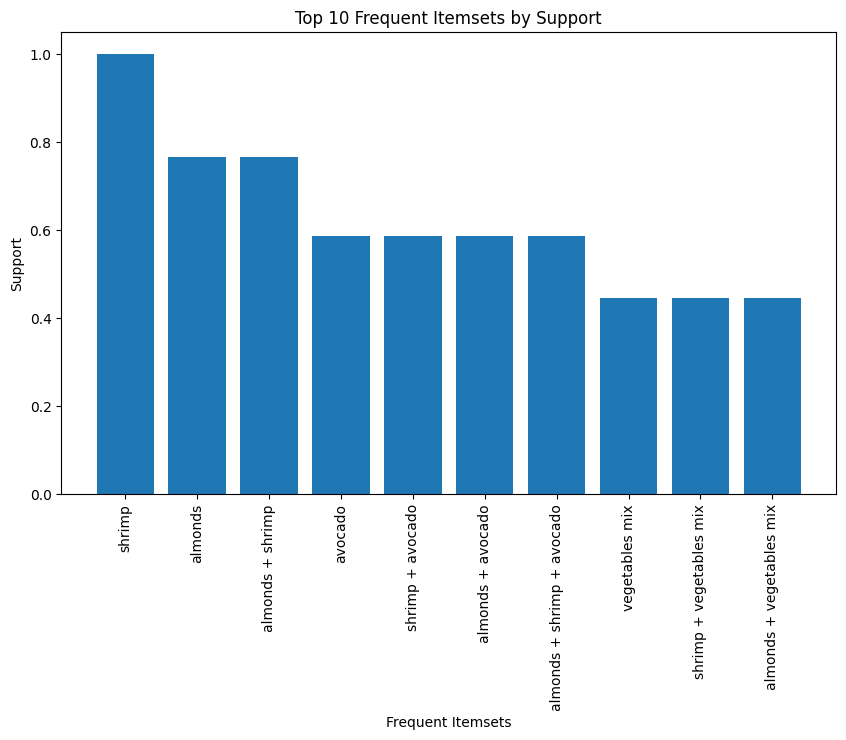

In [16]:
# Create a list of labels based on the itemsets
labels = [' + '.join(list(item)) for item in top_10_frequent_itemsets['itemsets']]

# Plot the histogram with itemset names as labels
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_frequent_itemsets)), top_10_frequent_itemsets['support'], tick_label=labels)
plt.xlabel('Frequent Itemsets')
plt.ylabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


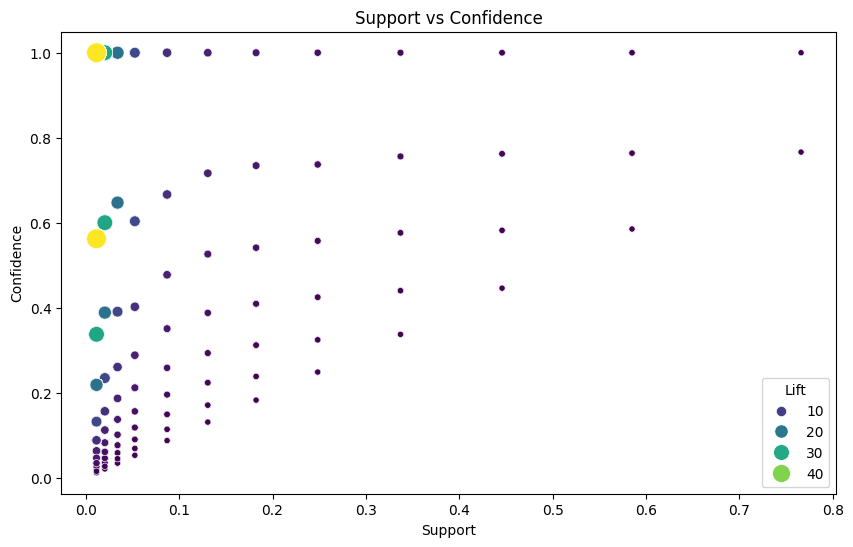

In [4]:
import seaborn as sns

# 산점도 (Support vs Confidence)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()


In [12]:
# 지지도, 신뢰도, 향상도가 높은 상위 5개의 규칙을 필터링
top_rules = rules.nlargest(5, ['support', 'confidence', 'lift'])

# 상위 규칙을 출력하여 어떤 항목들이 포함되어 있는지 확인
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           antecedents        consequents   support  confidence      lift
0            (almonds)           (shrimp)  0.766133    1.000000  1.000000
1             (shrimp)          (almonds)  0.766133    0.766133  1.000000
25           (avocado)          (almonds)  0.585067    1.000000  1.305256
158  (shrimp, avocado)          (almonds)  0.585067    1.000000  1.305256
161          (avocado)  (almonds, shrimp)  0.585067    1.000000  1.305256


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


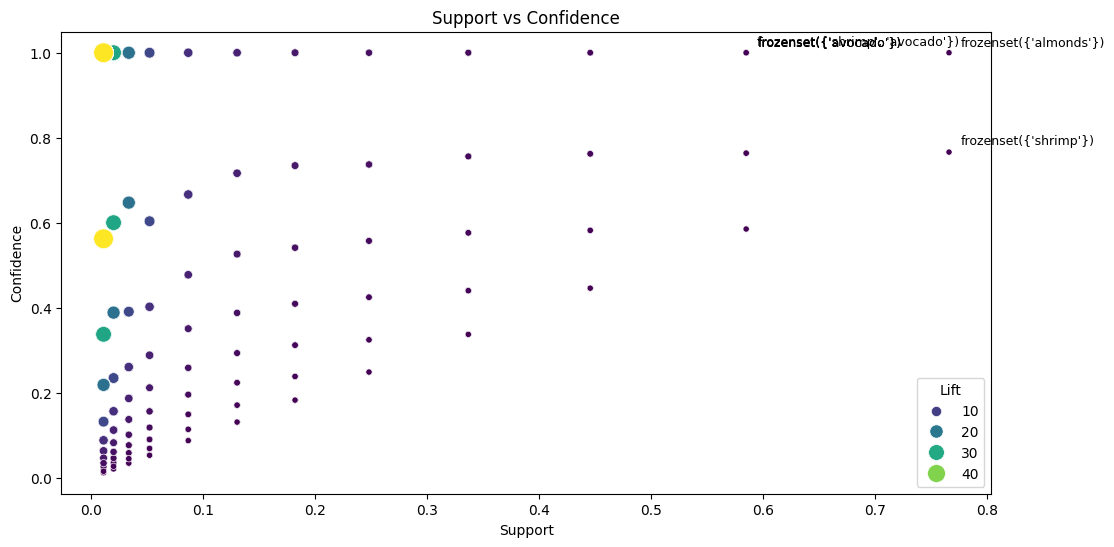

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 생성
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))

# Lift 값이 특정 임계값 이상인 규칙들만 텍스트로 표시하고 화살표로 연결
threshold = 20
for i in range(len(rules)):
    if rules.iloc[i]['lift'] >= threshold:
        plt.annotate(
            str(rules.iloc[i]['antecedents']) + " -> " + str(rules.iloc[i]['consequents']),
            xy=(rules.iloc[i]['support'], rules.iloc[i]['confidence']),
            xytext=(rules.iloc[i]['support'] + 0.05, rules.iloc[i]['confidence'] + 0.05),
            textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            fontsize=9,
            ha='left',
            va='bottom'
        )

plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도 생성
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))

# Lift 값이 특정 임계값(예: 20) 이상인 규칙들만 텍스트로 표시
threshold = 20
for i in range(len(rules)):
    if rules.iloc[i]['lift'] >= threshold:
        plt.text(rules.iloc[i]['support'] + 0.01, rules.iloc[i]['confidence'] + 0.01,
                 str(rules.iloc[i]['antecedents']) + " -> " + str(rules.iloc[i]['consequents']),
                 fontsize=9, ha='left', va='bottom')

plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(loc='best', title='Lift')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


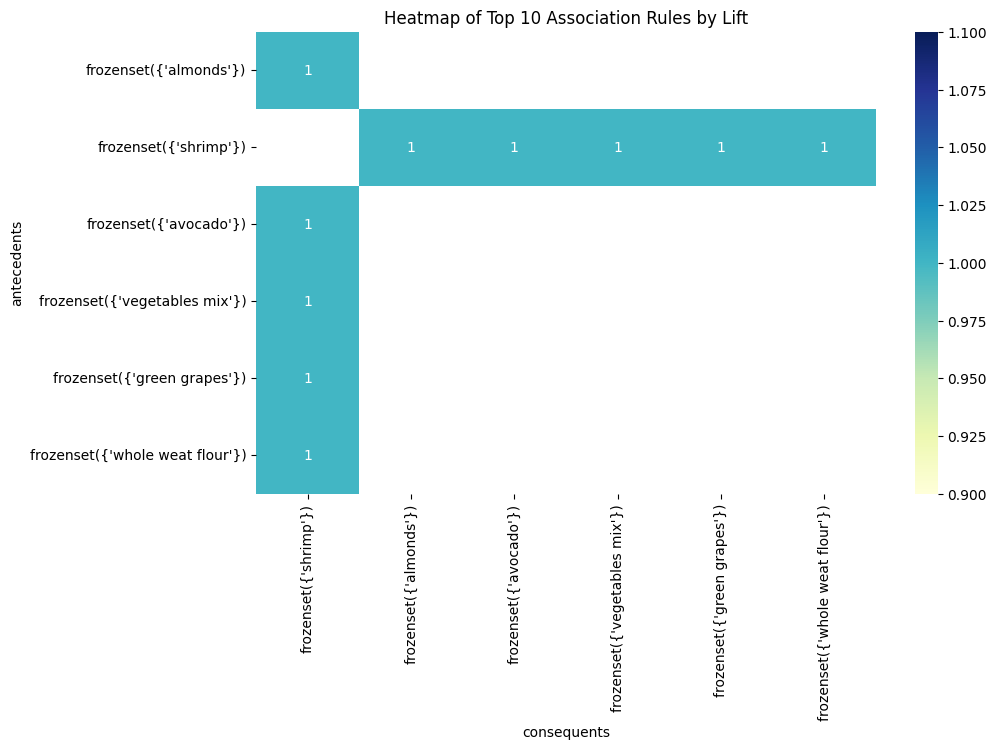

In [7]:
# 상위 10개의 규칙만 추출하여 히트맵으로 시각화
top_rules = rules.head(10)
plt.figure(figsize=(10, 6))
# Use keyword arguments for index, columns, and values
sns.heatmap(top_rules.pivot(index='antecedents', columns='consequents', values='lift'), annot=True, cmap='YlGnBu')
plt.title('Heatmap of Top 10 Association Rules by Lift')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


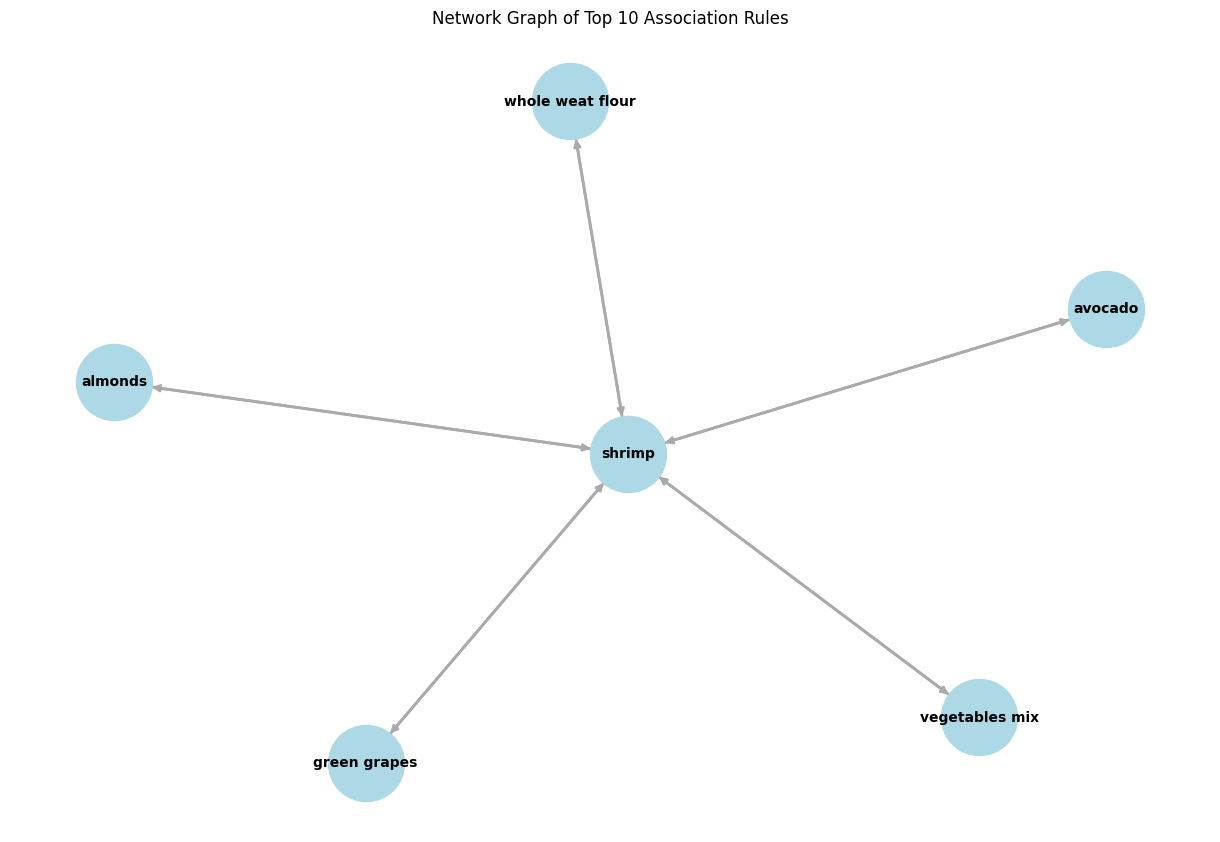

In [8]:
import networkx as nx

# 상위 10개의 규칙만 추출하여 네트워크 그래프 생성
G = nx.DiGraph()

for i, row in top_rules.iterrows():
    G.add_edge(', '.join(row['antecedents']), ', '.join(row['consequents']), weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='#AAAAAA', width=2)
plt.title('Network Graph of Top 10 Association Rules')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-7b45f645e682>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')


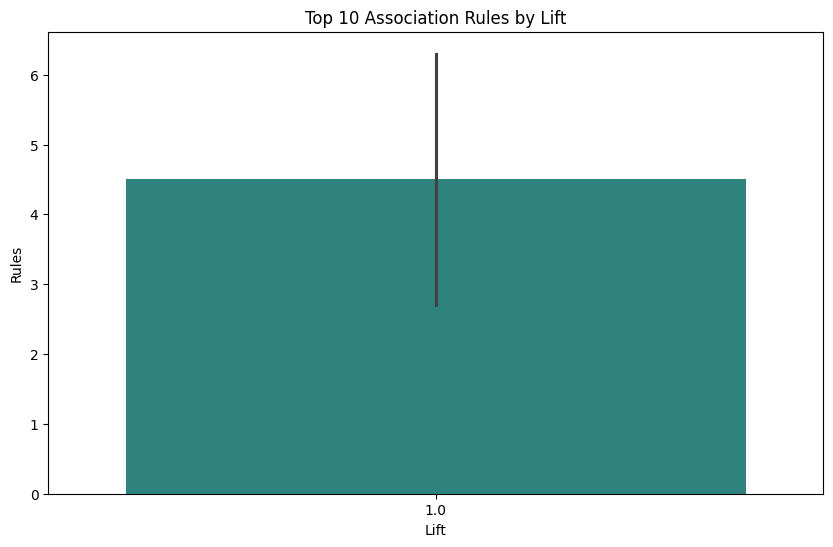

In [9]:
# Lift 값을 기준으로 상위 10개의 규칙을 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()
